## # Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

## #1 Dataset Overview

In [ ]:
# Download the file from Google Drive
!gdown 1OQOQvSdSwHdeqkHBTQjCoPz3tR3A0uJm

Downloading...
From: https://drive.google.com/uc?id=1OQOQvSdSwHdeqkHBTQjCoPz3tR3A0uJm
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 16.9MB/s]


In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


* Product Purchased:	KP281, KP481, or KP781
* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in $)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week


In [ ]:
df.shape

(180, 9)

* The dataset consists of 180 Customers
* **Customer ID** Feature are missing, although each row has a unique Customer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* There are no NaNs        

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


* Among above features **Education**, **Usage** and **Fitness** are categorical features (unlike other features in above table)
* Customers are in **Age** range of **18 to 50**

In [ ]:
for col in df.columns:
  print(col, ': ', df[col].value_counts(), '\n')

Product :  Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64 

Age :  Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64 

Gender :  Gender
Male      104
Female     76
Name: count, dtype: int64 

Education :  Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64 

MaritalStatus :  MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64 

Usage :  Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64 

Fitness :  Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64 

Income :  Income
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     

* There are 3 Products
* Getting Bins in Age will be useful
* Education **16**, **14**, **18** contribute to major sales
* Males are dominating the sales
* Most Customers are at Fitness level 3
* **Income** and **Miles** are Numerical Features


## #2. Exploring Numerical Features

### #2.1 Product vs Income

<Axes: xlabel='Product', ylabel='Income'>

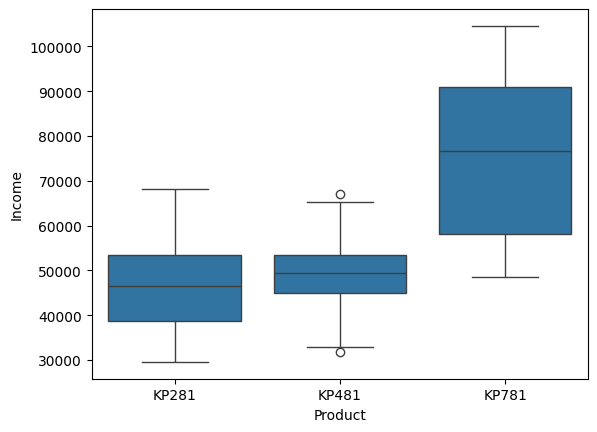

In [ ]:
sns.boxplot(x='Product', y='Income', data=df)

* **KP781** is distinctly preferred by Customers with high income
* Customers with more than **60,000** income are in **High Income Group**
* Customers with income from **40,000** to **60,000** are **Medium Income Group**
* Customers with income below **40,000** are **Low Income Group**
* There are minimal outliers

### #2.2 Product vs Miles

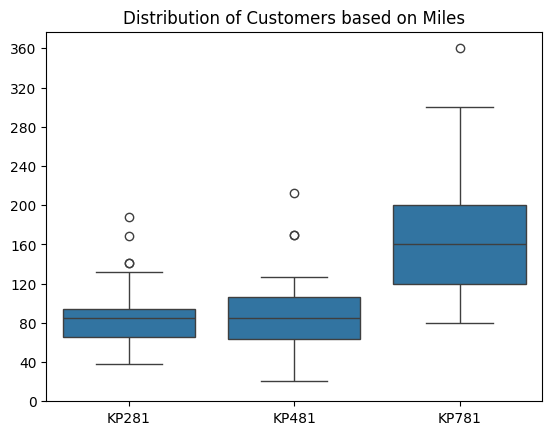

In [ ]:
sns.boxplot(x='Product', y='Miles', data=df)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Customers based on Miles')

plt.yticks(np.linspace(0, df['Miles'].max(), 10))

plt.show()

* Customers planning to walk/run more than equal to 120 miles a week prefer **KP781**
* Customers planning to walk/run less or equal to 100 miles (approx) a week prefer **KP281** and **KP481**.
* There are outliers, that can be removed

### #2.3 Product vs Age

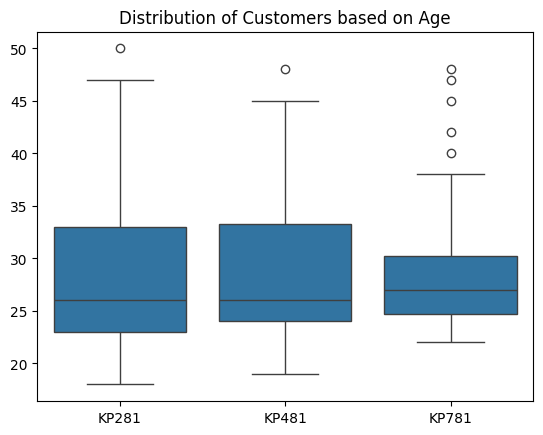

In [ ]:
sns.boxplot(x='Product', y='Age', data=df)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Customers based on Age')
plt.show()

* Customers relatively in youger age group prefer **KP781**

## #2 Preparing Features

### #2.1 Adding Customer_ID Feature

In [ ]:
df['Customer_ID'] = df.index
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_ID
0,KP281,18,Male,14,Single,3,4,29562,112,0
1,KP281,19,Male,15,Single,2,3,31836,75,1
2,KP281,19,Female,14,Partnered,4,3,30699,66,2
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,4


### #2.2 Binning Age Feature

In [ ]:
df['Age_Range'] = pd.cut(df['Age'], bins=[17, 23, 28, 33, 38, 43, 50], labels=['18-23', '24-28', '29-33', '34-38', '39-43', '44-50'])
df[df['Age'] == 23].head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_ID,Age_Range
14,KP281,23,Male,16,Partnered,3,1,38658,47,14,18-23
15,KP281,23,Male,16,Partnered,3,3,40932,75,15,18-23
16,KP281,23,Female,14,Single,2,3,34110,103,16,18-23
17,KP281,23,Male,16,Partnered,4,3,39795,94,17,18-23
18,KP281,23,Female,16,Single,4,3,38658,113,18,18-23


In [ ]:
df[df['Age_Range'].isna()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_ID,Age_Range


## #3 Exploring Categorical Features

In [ ]:
prod_counts = df['Product'].value_counts()
prod_counts

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

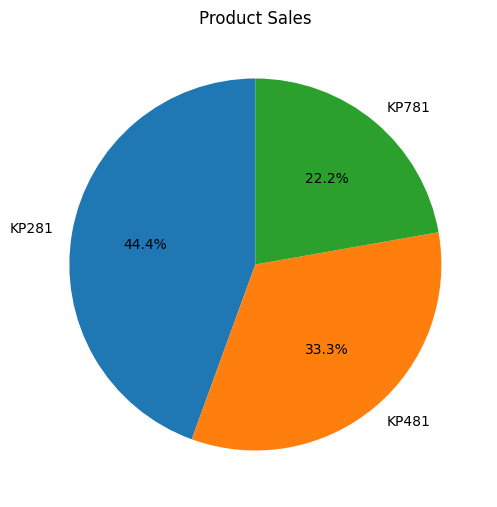

In [ ]:
figure = plt.figure(figsize = (6,9))
plt.pie(prod_counts, labels=prod_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales')
plt.show()

* **KP281** contributes to **44%** of the sales

### #3.1 Product vs Gender

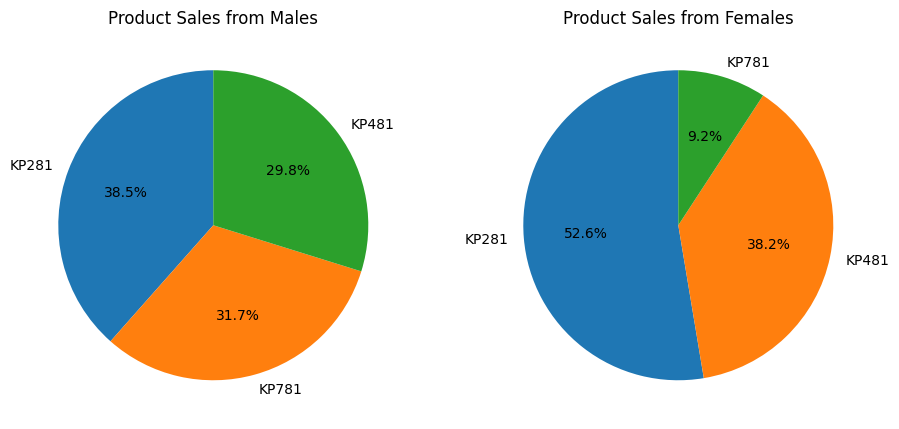

In [ ]:
figure = plt.figure(figsize = (11,16))

plt.subplot(1,2,1)
plt.pie(df[df['Gender'] == 'Male']['Product'].value_counts(), labels=df[df['Gender'] == 'Male']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Males')

plt.subplot(1,2,2)
plt.pie(df[df['Gender'] == 'Female']['Product'].value_counts(), labels=df[df['Gender'] == 'Female']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Females')

plt.show()


### #3.2 Product vs Marital Status

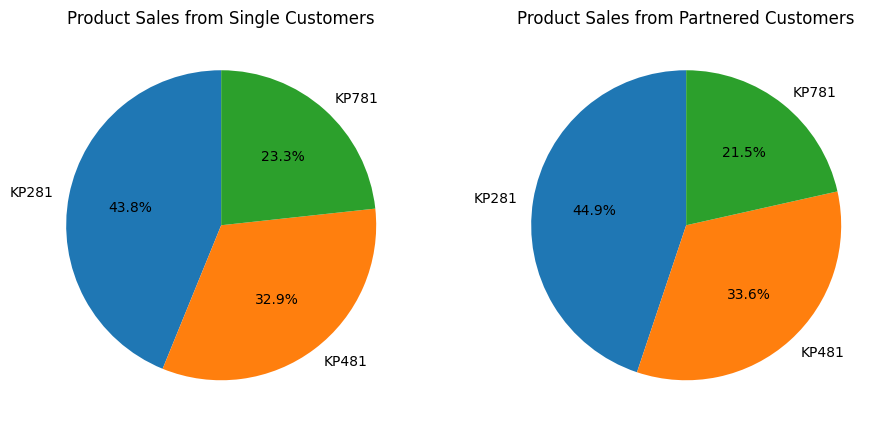

In [ ]:
figure = plt.figure(figsize = (11,16))

plt.subplot(1,2,1)
plt.pie(df[df['MaritalStatus'] == 'Single']['Product'].value_counts(), labels=df[df['MaritalStatus'] == 'Single']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Single Customers')

plt.subplot(1,2,2)
plt.pie(df[df['MaritalStatus'] == 'Partnered']['Product'].value_counts(), labels=df[df['MaritalStatus'] == 'Single']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Partnered Customers')
plt.show()

* There is negligible **(not more than 2%)** deviation in proportion, Marital Status is not significant feature to determine choice of Product.

### #3.3 Product vs Education

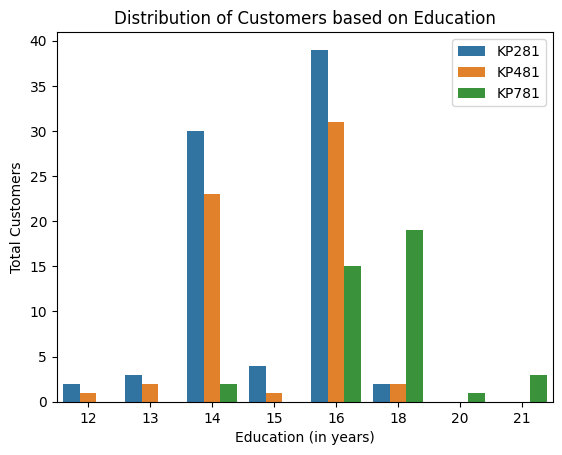

In [ ]:
sns.countplot(x='Education', data=df, hue='Product')
plt.xlabel('Education (in years)')
plt.ylabel('Total Customers')
plt.legend(['KP281', 'KP481', 'KP781'])
plt.title('Distribution of Customers based on Education')
plt.show()

* Customers with Education of **14 years**, **16 years** and **18 years** are top 3 buyers.
* Exceptionally Customers with Education of **18 years**, **20 years** and **21 years** prefer **KP781** over **KP481** and **KP281** (unlike others).

### #3.4 Product vs Usage

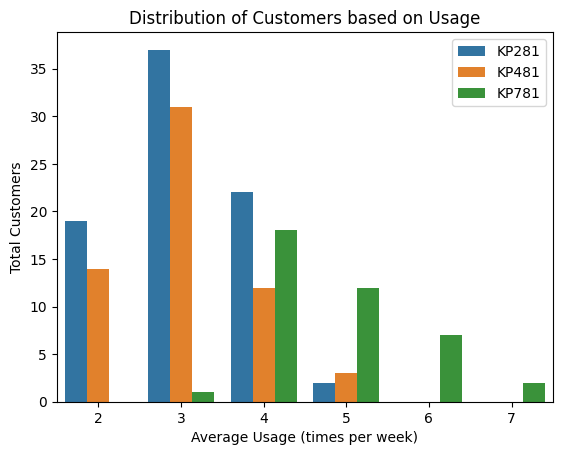

In [ ]:
sns.countplot(x='Usage', data=df, hue='Product')
plt.xlabel('Average Usage (times per week)')
plt.ylabel('Total Customers')
plt.legend(['KP281', 'KP481', 'KP781'])
plt.title('Distribution of Customers based on Usage')
plt.show()

* Customers using treadmill 4 or less times a week highly prefer **KP281** followed by **KP481**. .
* Customers using treadmill 5 or more times a week prefer **KP781** over others.


### #3.5 Product vs Fitness

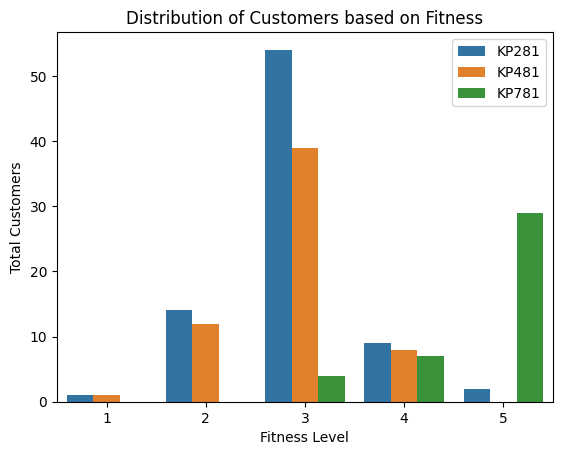

In [ ]:
sns.countplot(x='Fitness', data=df, hue='Product')
plt.xlabel('Fitness Level')
plt.ylabel('Total Customers')
plt.legend(['KP281', 'KP481', 'KP781'])
plt.title('Distribution of Customers based on Fitness')
plt.show()

* Customers with fitness level 3 highly prefer **KP281** followed by **KP481**.
* Customers with fitness level 1 and fitness level 2 prefer **KP281** and **KP481** equally.
* Customers with fitness level 4 prefer **KP281**, **KP481** and **KP781** equally.
* Customers with fitness level 5 highly prefer **KP781**.



In [ ]:

# figure = plt.figure(figsize = (17,24))

# plt.subplot(1,3,1)
# plt.pie(df[df['Product'] == 'KP281']['Fitness'].value_counts(), labels=df[df['Product'] == 'KP281']['Fitness'].value_counts().index, autopct='%1.1f%%', startangle=90)
# plt.title('Sales of KP281 based on Fitness')

# plt.subplot(1,3,2)
# plt.pie(df[df['Product'] == 'KP481']['Fitness'].value_counts(), labels=df[df['Product'] == 'KP481']['Fitness'].value_counts().index, autopct='%1.1f%%', startangle=90)
# plt.title('Sales of KP481 based on Fitness')

# plt.subplot(1,3,3)
# plt.pie(df[df['Product'] == 'KP781']['Fitness'].value_counts(), labels=df[df['Product'] == 'KP781']['Fitness'].value_counts().index, autopct='%1.1f%%', startangle=90)
# plt.title('Sales of KP781 based on Fitness')

# plt.show()

In [ ]:
df['Age_Range'].unique()

['18-23', '24-28', '29-33', '34-38', '39-43', '44-50']
Categories (6, object): ['18-23' < '24-28' < '29-33' < '34-38' < '39-43' < '44-50']

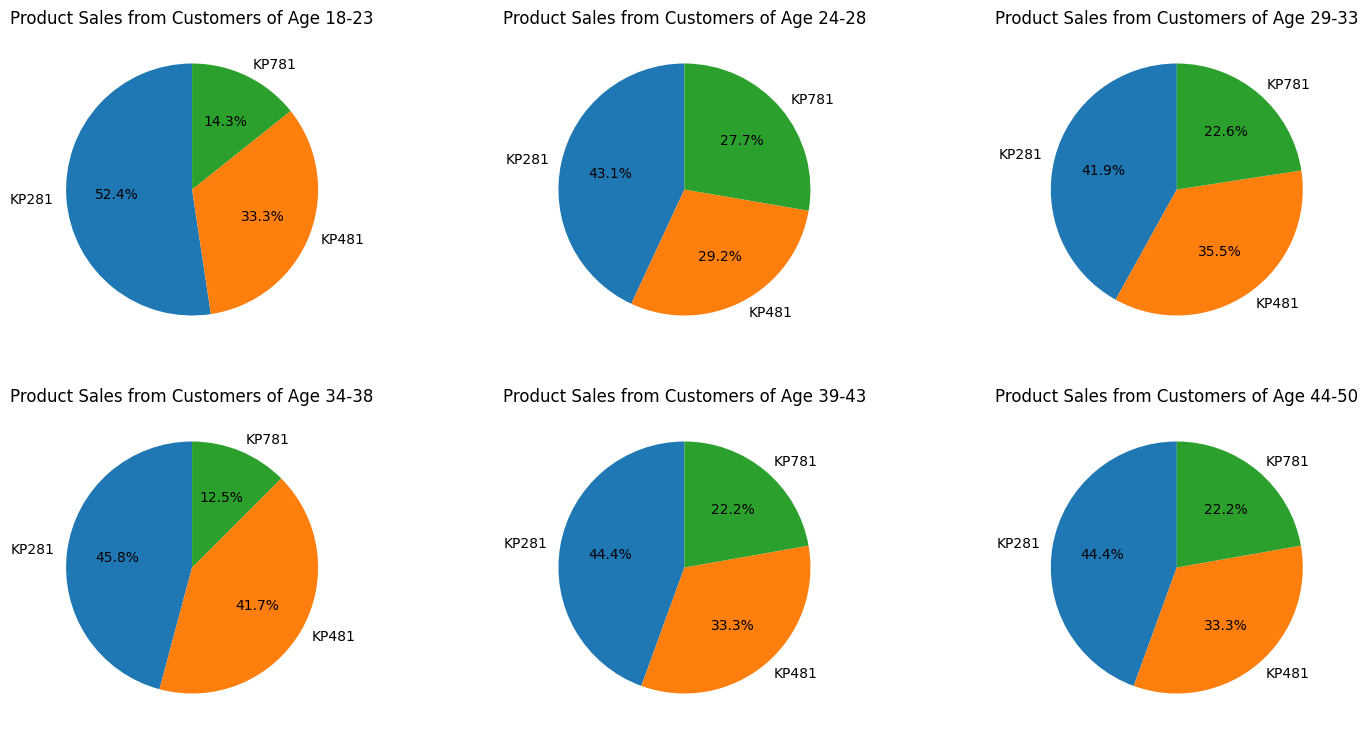

In [ ]:
figure = plt.figure(figsize = (18,9))

plt.subplot(2,3,1)
plt.pie(df[df['Age_Range'] == '18-23']['Product'].value_counts(), labels=df[df['MaritalStatus'] == 'Single']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Customers of Age 18-23')

plt.subplot(2,3,2)
plt.pie(df[df['Age_Range'] == '24-28']['Product'].value_counts(), labels=df[df['MaritalStatus'] == 'Single']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Customers of Age 24-28')

plt.subplot(2,3,3)
plt.pie(df[df['Age_Range'] == '29-33']['Product'].value_counts(), labels=df[df['MaritalStatus'] == 'Single']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Customers of Age 29-33')

plt.subplot(2,3,4)
plt.pie(df[df['Age_Range'] == '34-38']['Product'].value_counts(), labels=df[df['MaritalStatus'] == 'Single']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Customers of Age 34-38')

plt.subplot(2,3,5)
plt.pie(df[df['Age_Range'] == '39-43']['Product'].value_counts(), labels=df[df['MaritalStatus'] == 'Single']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Customers of Age 39-43')

plt.subplot(2,3,6)
plt.pie(df[df['Age_Range'] == '44-50']['Product'].value_counts(), labels=df[df['MaritalStatus'] == 'Single']['Product'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Sales from Customers of Age 44-50')


plt.show()

* All age groups have similar preferences of Products
* Exceptionally **18-23** and **34-38** age groups do not prefer **KP781**
* Customers in age of **24-28** prefer **KP781** more, compared to other age groups.

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_ID,Age_Range
0,KP281,18,Male,14,Single,3,4,29562,112,0,18-23
1,KP281,19,Male,15,Single,2,3,31836,75,1,18-23
2,KP281,19,Female,14,Partnered,4,3,30699,66,2,18-23
3,KP281,19,Male,12,Single,3,3,32973,85,3,18-23
4,KP281,20,Male,13,Partnered,4,2,35247,47,4,18-23


## #4 Extracting Customer Behavior

### #4.1 Correlation Among Customer Features

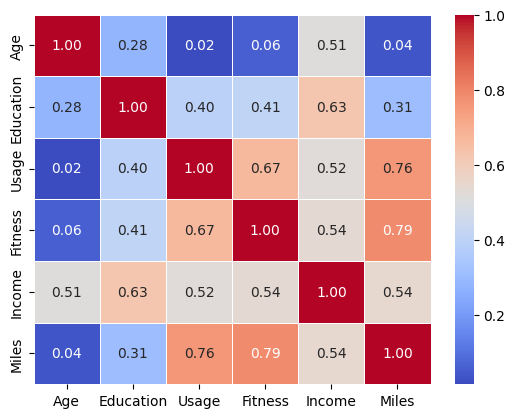

In [ ]:
df_corr = df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]

mat = df_corr.corr()

sns.heatmap(mat, annot=True,  cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

* High **Income** Customers tend to have slightly higher **Age**, **Education**, **Usage**, **Fitness**, **Income**, **Miles**
* Customers planning higher **Miles** have higher **Usage** and **Fitness**
* Customers with higher **Education** tend to have higher **income**

### **Income is a key variable on which other parameters tend to be positively correlated.**
* Therefore in following sections, we will try to identify Income of Customers, as usually this information is not conviniently shared by Customers, and knowing this we can have a good propotionate understanding of other variables required for recommendations, as well as paying capacity of Customers.

### #Q1.  What is probability that a Gender will buy Product?

Preparing Dataframe for Analysis

In [ ]:
df_stats = df.pivot(index=	['Age',	'Gender',	'Education',	'MaritalStatus',	'Usage',	'Fitness',	'Income',	'Miles'	,'Customer_ID'	,'Age_Range'], columns='Product', values='Income')
df_stats.reset_index(inplace=True)

df_stats['KP281'] = df_stats['KP281'].apply(lambda x: not pd.isna(x))
df_stats['KP481'] = df_stats['KP481'].apply(lambda x: not pd.isna(x))
df_stats['KP781'] = df_stats['KP781'].apply(lambda x: not pd.isna(x))

df_stats.head()

Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_ID,Age_Range,KP281,KP481,KP781
0,18,Male,14,Single,3,4,29562,112,0,18-23,True,False,False
1,19,Female,14,Partnered,4,3,30699,66,2,18-23,True,False,False
2,19,Male,12,Single,3,3,32973,85,3,18-23,True,False,False
3,19,Male,14,Single,3,3,31836,64,80,18-23,False,True,False
4,19,Male,15,Single,2,3,31836,75,1,18-23,True,False,False


#### 1.1 KP281

In [ ]:
pd.crosstab(index=df_stats['Gender'],
            columns=df_stats['KP281'],
            margins=True,
            margins_name='Total'
            )

KP281,False,True,Total
Gender,,,
Female,36,40,76
Male,64,40,104
Total,100,80,180


In [ ]:
# prob that female / male buy KP281
prob_female = 40/180
prob_male = 40/180

print(np.round(prob_female, 2), np.round(prob_male, 2))

0.22 0.22


#### 1.2 KP481

In [ ]:
pd.crosstab(index=df_stats['Gender'],
            columns = df_stats['KP481'],
            margins=True,
            margins_name='Total')

KP481,False,True,Total
Gender,,,
Female,47,29,76
Male,73,31,104
Total,120,60,180


In [ ]:
# prob that female / male buy KP481
prob_female = 29/180
prob_male = 31/180

print(np.round(prob_female, 2), np.round(prob_male, 2))

0.16 0.17


* Female and Males equally prefer **KP481** and **KP281**

#### 1.2 KP781

In [ ]:
pd.crosstab(index=df_stats['Gender'],
            columns = df_stats['KP781'],
            margins=True,
            margins_name='Total')

KP781,False,True,Total
Gender,,,
Female,69,7,76
Male,71,33,104
Total,140,40,180


In [ ]:
# prob that female or male buy KP281
prob_female = 7/180
prob_male = 33/180

print(np.round(prob_female, 2), np.round(prob_male, 2))

0.04 0.18


* Females rarely prefer **KP781**

## #Q2. What is the probability that person planning to run more miles will belong to higher income group?

* Identifying **Income** is vital, as usually Customers are not willing to disclose their income, they would rather tell about Miles preferences.
* Additionally with Correlation map we identified, all metrics tend to be positively correlated with income. So, this will be a vital feature to determine for effective marketing and sales.
* We will also re-validate and proove our hypothesis below.

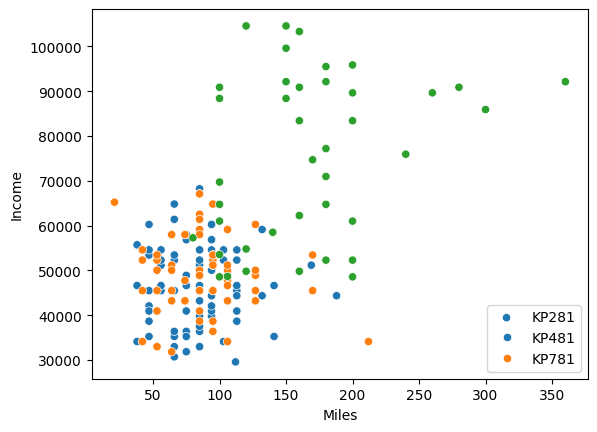

In [ ]:
sns.scatterplot(x='Miles', y='Income', data=df, hue='Product')
plt.xlabel('Miles')
plt.ylabel('Income')
plt.legend(['KP281', 'KP481', 'KP781'], loc='lower right')
plt.show()

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Customer_ID', 'Age_Range'],
      dtype='object')

In [ ]:
# df_miles = df[['Miles', 'Income', 'Product']]
df['Miles_Range'] = df['Miles'].apply(lambda x: 'Low' if x < 60 else 'Medium' if x <= 120 else 'High')
df['Income_Range'] = df['Income'].apply(lambda x: 'Low' if x < 40000 else 'Medium' if x <= 60000 else 'High')

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_ID,Age_Range,Miles_Range,Income_Range
0,KP281,18,Male,14,Single,3,4,29562,112,0,18-23,Medium,Low
1,KP281,19,Male,15,Single,2,3,31836,75,1,18-23,Medium,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,2,18-23,Medium,Low
3,KP281,19,Male,12,Single,3,3,32973,85,3,18-23,Medium,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,4,18-23,Low,Low


#### #KP281

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP281']['Income_Range'],
    columns = [df[df['Product'] == 'KP281']['Miles_Range']],
    margins=True,
    margins_name='Total'
)

Miles_Range,High,Low,Medium,Total
Income_Range,,,,
High,0,1,5,6
Low,1,3,19,23
Medium,5,14,32,51
Total,6,18,56,80


In [ ]:
print(f'{np.round((80/180 * 100), 1)}% of customers are buying KP281', end='\n')
print(f'{np.round((32/80 * 100), 1)}% customers buying KP281, belong to Medium Income group and plan Medium Miles', end='\n')
print(f'{np.round((19/80 * 100), 1)}% customers buying KP281, belong to Low Income group and plan Medium Miles', end='\n')
print(f'{np.round((14/80 * 100), 1)}% customers buying KP281, belong to Medium Income group and plan Low Miles', end='\n')

44.4% of customers are buying KP281
40.0% customers buying KP281, belong to Medium Income group and plan Medium Miles
23.8% customers buying KP281, belong to Low Income group and plan Medium Miles
17.5% customers buying KP281, belong to Medium Income group and plan Low Miles


In [ ]:
print('Overall Income Analysis')
print(f'{np.round((56/80 * 100), 1)}% customers buying KP281, belong to Medium Income group', end='\n')
print(f'{np.round((18/80 * 100), 1)}% Customers below to low income group', end='\n')
print(f'{np.round((6/80 * 100), 1)}% Customers belong to high income group')

Overall Income Analysis
70.0% customers buying KP281, belong to Medium Income group
22.5% Customers below to low income group
7.5% Customers belong to high income group


* Probability that Customer has medium income, if he prefers medium miles is calculated as below
* **p(med_income | med_miles) = p(med_income & med_miles) / p(med_miles)**
* **p = (32/80)/(56/80)**

In [ ]:
(32/80)/(56/80)

0.5714285714285715

* So **57%** of customers prefering Medium Miles are in **Medium Income Group** group.
* These will be potential customers for **KP281**, as **70.0%** customers buying KP281, belong to **Medium Income group**

#### #KP481

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP481']['Income_Range'],
    columns=df[df['Product'] == 'KP481']['Miles_Range'],
    margins=True,
    margins_name='Total'
)

Miles_Range,High,Low,Medium,Total
Income_Range,,,,
High,1,1,5,7
Low,1,3,5,9
Medium,6,8,30,44
Total,8,12,40,60


In [ ]:
print(f'{np.round((60/180 * 100), 1)}% of customers are buying KP481', end='\n')
print(f'{np.round((30/60 * 100), 1)}% customers buying KP481, belong to Medium Income group and plan Medium Miles', end='\n')
print(f'{np.round((8/60 * 100), 1)}% customers buying KP481, belong to Medium Income group and plan Low Miles', end='\n')
print(f'{np.round((6/60 * 100), 1)}% customers buying KP481, belong to Medium Income group and plan High Miles', end='\n')

33.3% of customers are buying KP481
50.0% customers buying KP481, belong to Medium Income group and plan Medium Miles
13.3% customers buying KP481, belong to Medium Income group and plan Low Miles
10.0% customers buying KP481, belong to Medium Income group and plan High Miles


In [ ]:
print('Overall Income Analysis')
print(f'{np.round((44/60 * 100), 1)}% customers buying KP281, belong to Medium Income group', end='\n')
print(f'{np.round((9/60 * 100), 1)}% Customers below to low income group', end='\n')
print(f'{np.round((7/60 * 100), 1)}% Customers belong to high income group')

Overall Income Analysis
73.3% customers buying KP281, belong to Medium Income group
15.0% Customers below to low income group
11.7% Customers belong to high income group


* Probability that Customer has medium income, if he prefers medium miles is calculated as below
* **p(med_income | med_miles) = p(med_income & med_miles) / p(med_miles)**
* **p = (30/60)/(40/60)**

In [ ]:
(30/60)/(40/60)

0.75

a* So **75%** of customers prefering Medium Miles are in **Medium Income Group** group.
* These will be potential customers for **KP481**, as **73.3%** (largest portion) customers buying KP481, belong to **Medium Income group**

#### #KP781

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP781']['Income_Range'],
    columns=df[df['Product'] == 'KP781']['Miles_Range'],
    margins=True,
    margins_name='Total'
)

Miles_Range,High,Medium,Total
Income_Range,,,
High,23,6,29
Medium,5,6,11
Total,28,12,40


In [ ]:
print(f'{np.round((40/180 * 100), 1)}% of customers are buying KP781', end='\n')
print('No Customers in Low Income Group are buying KP781', end='\n')
print('No Customers buying KP781 are planning low Miles', end='\n')

22.2% of customers are buying KP781
No Customers in Low Income Group are buying KP781
No Customers buying KP781 are planning low Miles


In [ ]:
print(f'{np.round((23/40 * 100), 1)}% customers buying KP781, belong to High Income group and plan High Miles', end='\n')
print(f'{np.round((6/40 * 100), 1)}% customers buying KP781, belong to High Income group and plan Medium Miles', end='\n')
print(f'{np.round((6/40 * 100), 1)}% customers buying KP781, belong to Medium Income group and plan Medium Miles', end='\n')
print(f'{np.round((5/40 * 100), 1)}% customers buying KP781, belong to Medium Income group and plan High Miles', end='\n')

57.5% customers buying KP781, belong to High Income group and plan High Miles
15.0% customers buying KP781, belong to High Income group and plan Medium Miles
15.0% customers buying KP781, belong to Medium Income group and plan Medium Miles
12.5% customers buying KP781, belong to Medium Income group and plan High Miles


* Probability that Customer has high income, if he prefers high miles is calculated as below
* **p(high_income | high_miles) = p(high_income & high_miles) / p(high_income)**
* **p = (23/40)/(28/40)**

In [ ]:
(23/40)/(28/40)

0.8214285714285714

* So **82%** of customers prefering Higher Miles are in **High Income Group** group. These will be potential customers for **KP781**
* Lower Volume of **KP781** is justified as it sells to High Income Customers.
* Since **KP781** primarily sells to **High Income Customers**, imposing higher price on this product, basis regular quality improvements can improve profits.
  

* Our observation that Income and Miles planned are proportional is prooved correct

## #Q3. What is the probability that person beloging to an **age group level** will belong to proportionate **income group level**?

* This information is vital, as usually Customers are not willing to disclose their income, they would rather tell about Miles preferences.
* Additionally with Correlation map we identified, all metrics tend to be positively correlated with income. So, this will be a vital feature to determine for effective marketing and sales.

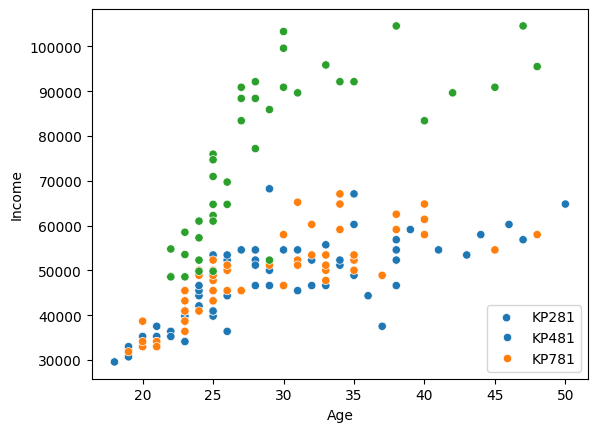

In [ ]:
sns.scatterplot(x='Age', y='Income', data=df, hue='Product')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['KP281', 'KP481', 'KP781'], loc='lower right')
plt.show()

* There seems some correlation between Income and Age, this will be investigated further

#### #Age vs Income Distribution

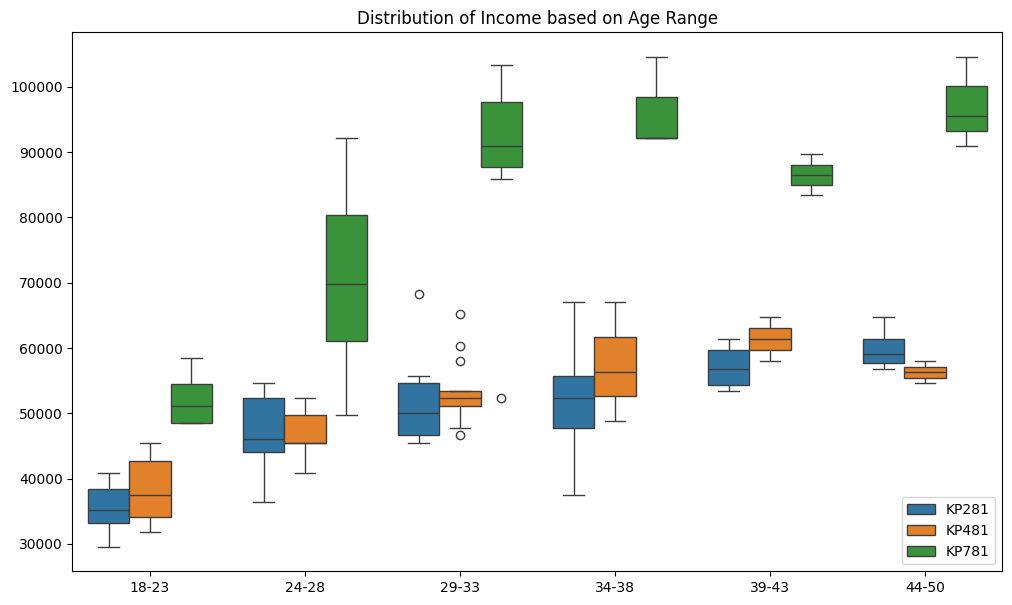

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Age_Range', y='Income', hue = 'Product', data=df)
plt.legend(loc='lower right')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Income based on Age Range')
plt.show()

* With Age Range we have identifying Income to increase
* The curve is more approximating to logarithmic, that may suggest that fewer Customers in higher age groups are buying Products

* There is a correlation between income and age, this correlation is more stronger for in **KP781**

In [ ]:
df['Age_Level'] = pd.cut(df['Age'], bins= [17, 28, 38, 51], labels = ['Low', 'Medium', 'High'])
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Customer_ID,Age_Range,Miles_Range,Income_Range,Age_Level
0,KP281,18,Male,14,Single,3,4,29562,112,0,18-23,Medium,Low,Low
1,KP281,19,Male,15,Single,2,3,31836,75,1,18-23,Medium,Low,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,2,18-23,Medium,Low,Low
3,KP281,19,Male,12,Single,3,3,32973,85,3,18-23,Medium,Low,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,4,18-23,Low,Low,Low


#### KP281

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP281']['Income_Range'],
    columns=df[df['Product'] == 'KP281']['Age_Level'],
    margins=True,
    margins_name='Total'
)

Age_Level,Low,Medium,High,Total
Income_Range,,,,
High,0,3,3,6
Low,22,1,0,23
Medium,28,18,5,51
Total,50,22,8,80


* Below is Analysis for **KP281**
* **p(low_income | low_age) = p(low_income & low_age) / p(low_age)**
* **p = (22/80)/(50/80) = 44%**

* **p(med_income | med_age) = p(med_income & med_age) / p(med_age)**
* **44%** Customers in low age group will have low income level.

* **p = (18/80)/(22/80) = 81.8%**
* **81.8%** in medium age group will have medium income.

* **p(high_income | high_age) = p(high_income & high_age) / p(med_age)**
* **p = (3/80)/(8/80) = 37.5%**
* **37.4%** in High age group will have High income.


In [ ]:
(22/80)/(50/80)

0.44000000000000006

In [ ]:
(18/80)/(22/80)

0.8181818181818181

In [ ]:
(3/80)/(8/80)

0.37499999999999994

### KP481

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP481']['Income_Range'],
    columns=df[df['Product'] == 'KP481']['Age_Level'],
    margins=True,
    margins_name='Total'
)

Age_Level,Low,Medium,High,Total
Income_Range,,,,
High,0,5,2,7
Low,9,0,0,9
Medium,23,18,3,44
Total,32,23,5,60


* Below is Analysis for **KP481**
* **p(low_income | low_age) = p(low_income & low_age) / p(low_age)**
* **p = (9/60)/(32/60) = 37.5%**
* **37.5%** in low age group will have low income.

* **p = (18/60)/(23/60) = 78.3%**
* **78.3%** in medium age group will have medium income.

* **p = (3/60)/(5/60) = 60%**
* **60%** in High age group will have High income.

In [ ]:
(9/60)/(32/60)

0.28125

In [ ]:
(18/60)/(23/60)

0.7826086956521738

In [ ]:
(3/60)/(5/60)

0.6000000000000001

### KP781

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP781']['Income_Range'],
    columns=df[df['Product'] == 'KP781']['Age_Level'],
    margins=True,
    margins_name='Total'
)

Age_Level,Low,Medium,High,Total
Income_Range,,,,
High,15,9,5,29
Medium,10,1,0,11
Total,25,10,5,40


* Below is Analysis for **KP781**
* **p(med_income | med_age) = p(med_income & med_age) / p(med_age)**
* **p = (1/40)/(10/40) = 10%**
* **10%** in medium age group will have medium income.

* **p(high_income | high_age) = p(high_income & high_age) / p(high_age)**
* **p = (5/40)/(5/40) = 100%**
* **100%** Customers in **High Age Group** will have high income.

* **25/40 x 100 = 62.5%** Customers buying **KP781** are of **Low Age Group** having **High or Medium** Income

In [ ]:
(1/40)/(10/40)

0.1

## Age Analysis Conclusion
* If we have a customer of **Medium Age Group** preferring **KP281** there is **81.8%** probablity that Customer has **Medium Income**.
* If we have a customer of **Medium Age Group** preferring **KP481** there is **78.2%** probablity that Customer has **Medium Income**.
* More than **95%** of **Low Age Group** Customers buying **KP241** and **KP481** are in **Low Income Group** and contributing in lesser proportion, they can be given incentives or promotions like student offers etc. to encourage them buying Aerofit.


* If we have a customer of High Age group preferring **KP481** there is **60%** probablity that Customer has **High Income**.
* These Customers can be provided some promotions or incentives to buy **KP781**, this will increase overall sales volume and profits of **Aerofit** (as KP781 is favorite in High Income Group).
* We also understood from previous analysis that these **KP781** is preferred for those running high miles, an awareness on running higher miles can be utilized for such Marketing.

* Most of the Customers for All Aerofit Products are in **Lower or Middle Age Groups**, so the these Products should be designed based on youthful customer persona.

* Our understanding that **age** is proportional to **income** is successfully prooved, therefore one to one marketing should be designed based on this understanding.

## #Q4. What is Probability that Fitness levels are proportionate to Income for different Products?

#### #KP281

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP281']['Income_Range'],
    columns=df[df['Product'] == 'KP281']['Fitness'],
    margins=True,
    margins_name='Total'
)

Fitness,1,2,3,4,5,Total
Income_Range,,,,,,
High,0,1,5,0,0,6
Low,1,3,17,2,0,23
Medium,0,10,32,7,2,51
Total,1,14,54,9,2,80


* Customers at **Fitness Level 2, 3 and 4** prefer **KP281**
* **(54/80) x 100 = 67.5%** Customers buying **KP281** are at Fitness Level 3
* If a Customer belongs to **Fitness Level 3**, there is **(32/80)/(51/80) x 100 = 62.7%** probability that Customer belongs to **Medium Income Group**.   

In [ ]:
(54/80) * 100

67.5

In [ ]:
(32/80)/(51/80)

0.627450980392157

#### #KP481

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP481']['Income_Range'],
    columns=df[df['Product'] == 'KP481']['Fitness'],
    margins=True,
    margins_name='Total'
)

Fitness,1,2,3,4,Total
Income_Range,,,,,
High,1,0,6,0,7
Low,0,2,6,1,9
Medium,0,10,27,7,44
Total,1,12,39,8,60


* Only customers with **Fitness Level 2 and 3** prefer buying **KP481**.
* **(39/60) x 100 = 65%** Customers buying **KP481** are at Fitness Level 3
* If a Customer belongs to **Fitness Level 3**, there is **(27/60)/(44/80) x 100 = 81.8%** probability that Customer belongs to **Medium Income Group**.   

In [ ]:
(39/60)

0.65

In [ ]:
(27/60)/(44/80)

0.8181818181818181

* Customers at **Fitness Level 3** and **Medium Income** are dominating sales for KP281 and KP481

### Analysis for **KP781**

In [ ]:
pd.crosstab(
    index=df[df['Product'] == 'KP781']['Income_Range'],
    columns=df[df['Product'] == 'KP781']['Fitness'],
    margins=True,
    margins_name='Total'
)

Fitness,3,4,5,Total
Income_Range,,,,
High,3,6,20,29
Medium,1,1,9,11
Total,4,7,29,40


* Customers at **Fitness Level 5** are dominating sales of **KP781**
* **(29/40) x 100 = 72.5%** Customers buying **KP781** are at Fitness Level 5
* If a Customer belongs to **Fitness Level 5**, there is **(20/40)/(29/40) x 100 = 68.9%** probability that Customer belongs to **High Income Group**.
   

In [ ]:
(29/40) * 100

72.5

In [ ]:
(20/40)/(29/40)

0.6896551724137931

## #Q5. What is Probability that Customers buying Product based on Education?

In [ ]:
pd.crosstab(
    index=df['Product'],
    columns=df['Education'],
    margins=True,
    margins_name='Total'
    ,normalize = 'index'
)

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.025000,0.037500,0.375000,0.050000,0.487500,0.025000,0.000000,0.000000
KP481,0.016667,0.033333,0.383333,0.016667,0.516667,0.033333,0.000000,0.000000
KP781,0.000000,0.000000,0.050000,0.000000,0.375000,0.475000,0.025000,0.075000
Total,0.016667,0.027778,0.305556,0.027778,0.472222,0.127778,0.005556,0.016667


* **47.2%** of Sales is from Customers with Education of **16 years**
  * **51.7%** Sales of **KP481** is from Customers with Education of 16 years.
  * **48.7** Sales of **KP281** is from Customers with Education of 16 years
  * **37.5%** Sales of **KP781** is from Customers with Education of 16 years
* **30.6%** of Sales is from Customers with Education of **14 years**  
  * **50%** Sales of **KP781** is from Customers with Education of 14 years.
  * **38.3** Sales of **KP481** is from Customers with Education of 14 years
  * **37.5%** Sales of **KP281** is from Customers with Education of 14 years


* Customers with **14 years** Education have **KP781** as their favorite


In [ ]:
39/80 * 100

48.75

In [ ]:
30/80 * 100

37.5

## #Q6. What is Probability that Customers with Weekly Usage 5, 6, 7 are Rich?

In [ ]:
pd.crosstab(
    index=df['Product'],
    columns=df['Usage'],
    margins=True,
    margins_name='Total'
    ,normalize = 'index'
)

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.237500,0.462500,0.275000,0.025000,0.000000,0.000000
KP481,0.233333,0.516667,0.200000,0.050000,0.000000,0.000000
KP781,0.000000,0.025000,0.450000,0.300000,0.175000,0.050000
Total,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111


* **38.3%** of Sales is from Customers with Usage of **3 times**
  * **51.7%** Sales of **KP481** is from Customers with Usage of **3 times**.
  * **46.7** Sales of **KP281** is from Customers with Usage of **3 times**
* **28.9%** of Sales is from Customers with Usage of **4 times**  
  * **45%** Sales of **KP781** is from Customers with Usage of **4 times**.
  * **27.5** Sales of **KP281** is from Customers with Usage of **4 times**

